In [55]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [56]:
df = pd.read_csv('hr_raw_data_v2.csv')

In [57]:
df.head()

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
0,1,M,1972,51,NaN,6,Research Director,Research & Development,No,20,NaN,Full Time,Yes,NaN,No,5,0,5,"3,0",15,15,NaN,3,195370.00,16280.830000,2015.722222,NaN,"42330,17$",13,1,3,3,3,"3,0",7,NaN
1,2,M,1971,52,NaN,1,Manager,NaN,No,33,NaN,NaN,Yes,NaN,NaN,5,1,5,"3,0",11,9,Life Sciences,4,199990.00,16125.406667,2063.388889,NaN,"43331,17$",14,3,2,3,1,"3,0",0,"34,0"
2,3,M,1981,42,Married,4,Manager,Research & Development,No,22,NaN,NaN,Yes,travel_rarely,No,5,0,3,"3,0",11,15,Technical Degree,2,192320.00,15943.720000,1984.253968,NaN,"41669,33$",11,3,3,4,4,NaN,1,"22,0"
3,4,F,1976,47,Married,2,Research Director,Research & Development,No,20,NaN,Full Time,No,travel_rarely,NaN,4,2,2,"3,0",5,6,Medical,4,171690.00,14307.500000,1771.404762,NaN,"37199,50$",19,1,3,3,2,NaN,3,NaN
4,5,F,1977,46,Divorced,3,Sales Executive,Sales,No,19,NaN,NaN,No,NaN,No,4,1,5,"3,0",2,8,Technical Degree,3,153407.07,12783.920000,1582.771346,NaN,"33238,20$",12,1,4,1,4,"3,0",2,NaN


Text(0.5, 1.0, 'Correlation salary & gender')

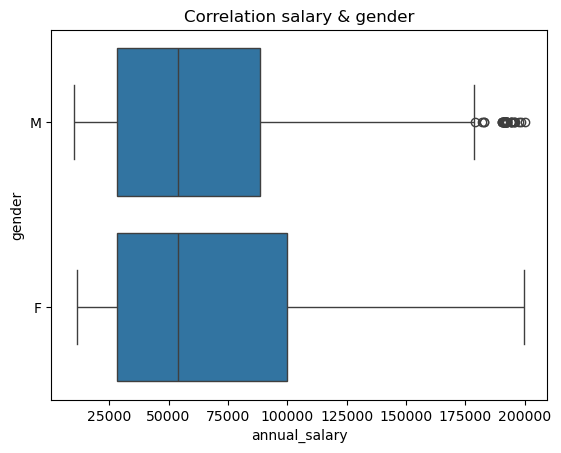

In [58]:
sns.boxplot(data=df, y='gender', x='annual_salary')
plt.title('Correlation salary & gender')

In [59]:
dist_home_negative = df[df['dist_home']<0]
dist_home_negative

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
18,19,M,1988,35,Married,-13,Research Scientist,Research & Development,No,16,NaN,NaN,No,NaN,NaN,2,0,2,"3,0",1,10,Life Sciences,5,53914.110000,4492.840000,556.256661,NaN,"11681,39$",11,2,4,1,4,"3,0",1,NaN
24,25,M,1987,36,NaN,-42,Sales Executive,Sales,No,18,NaN,Full Time,Yes,travel_rarely,NaN,2,1,1,"3,0",4,11,Life Sciences,2,62010.000000,5167.500000,639.785714,79.973214,"13435,50$",14,42,3,4,4,NaN,1,"18,0"
30,31,F,1982,41,Divorced,-37,Sales Executive,Sales,No,22,NaN,Full Time,Yes,NaN,NaN,3,1,3,"3,0",13,5,NaN,1,104470.000000,8705.830000,1077.865079,NaN,"22635,17$",13,37,3,3,4,"4,0",0,NaN
41,42,M,1982,41,Single,-35,Laboratory Technician,Research & Development,No,18,NaN,Full Time,Yes,travel_rarely,Yes,1,0,3,NaN,2,17,NaN,3,47210.000000,3934.170000,487.087302,60.885913,"10228,83$",13,35,3,1,3,"3,0",2,"20,0"
57,58,F,1974,49,NaN,-26,Manufacturing Director,Research & Development,No,15,NaN,Part Time,No,NaN,No,2,0,2,"3,0",5,11,Medical,4,53914.110000,4492.840000,556.256661,69.532083,"11681,39$",14,3,3,1,3,"2,0",1,"16,0"
68,69,F,1983,40,NaN,-25,Healthcare Representative,Research & Development,No,12,NaN,Part Time,Yes,NaN,No,2,3,0,"4,0",11,8,NaN,1,53914.110000,4492.840000,556.256661,NaN,"11681,39$",20,25,4,3,2,"3,0",5,"15,0"
79,80,M,1965,58,Single,-18,Sales Executive,Sales,No,37,NaN,Full Time,Yes,travel_rarely,NaN,4,0,1,"3,0",1,8,NaN,4,138720.000000,11560.000000,1431.238095,NaN,"30056,00$",13,4,3,3,3,"2,0",0,"38,0"
85,86,M,1982,41,NaN,-10,Manager,NaN,No,22,NaN,NaN,Yes,NaN,NaN,4,0,2,"3,0",0,4,NaN,4,160236.666667,13345.830000,1652.341270,NaN,"34699,17$",19,4,3,2,2,"3,0",1,NaN
89,90,F,1992,31,Married,-30,Manufacturing Director,Research & Development,No,13,NaN,NaN,Yes,NaN,No,2,1,5,"3,0",3,12,NaN,2,43076.666667,3588.330000,444.269841,NaN,"9329,67$",12,2,3,1,2,"1,0",1,"13,0"
90,91,M,1973,50,Married,-27,Manager,Research & Development,No,27,NaN,Full Time,Yes,travel_rarely,No,4,1,2,"3,0",15,7,Life Sciences,4,170460.000000,14205.000000,1758.714286,NaN,"36933,00$",15,27,2,3,2,"3,0",0,"28,0"
